<a href="https://colab.research.google.com/github/asadali99/Haystack_analytics/blob/main/Haystack_Bioinformatics_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A. Explain whole exome sequencing.

**Ans :** Whole Exome Sequencing(WES) is sequencing of all the expressed region in the genome i.e. the protein coding region, introns, LncRNA, miRNA, etc. It requires much lesser resources and time as compared to the Whole Genome Sequencing making it more cost-efficient. It is done to capture the variant information of the protein coding region, and gives information of the InDel, SNV variations.   
There are two major steps involved in WES:  
1. Target enrichment(To capture the exome from DNA)
2. Sequencing (Sequence the exome)  

Target enrichment is done using biotinylated oligonucleotide, targeted region(exome) from fragmented genome get hybridised with biotinylated oligonucleotide. Now it can be isolated using streptavidin which has a affinity for biotin.

Second step involves sequencing of the isolated region.

For WES studies 100x coverage is needed for 99.9% sensitivity, It is used for detecting variations in sequence and for clinical diagnostics

---
B. What is/are the reference sequences for the human genome? Explain in detail

GRCh38 is the reference sequence for the human genome. It is representative sequence that has been accepted as a standard sequence. It is used as reference for studying sequence variations, expression studies.  
There are multiple sequences present for human genomes, there are multiple variation in the human genomes. In this scenerio a reference sequence is required to represent all humans. For this task multiple human genomes are sequenced and the genome is annotated by genome reference consortium and a reference genome is released by them. For humans most recent and updated reference genome is GRCh38.  
Any human DNA sequence is aligned to human reference sequence for checking any variation or polymorphism.


---
C. Define the following terms (Use images to support your answer.)  

**a. Paired-end sequencing**  
Paired-end sequencing refers to sequencing the DNA fragment from both the ends. The adapter is ligated to both ends of the reads for sequencing.
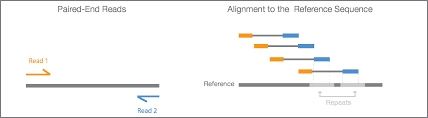

--Image Taken From Illumina site.  
**b. Phred score**  
Phred Score is indicative  of quality of base call during sequencing.

Phred Score(Q) = - 10 log P
where is (P) probability of error  
Higher Phred Score indicate base call with higher quality
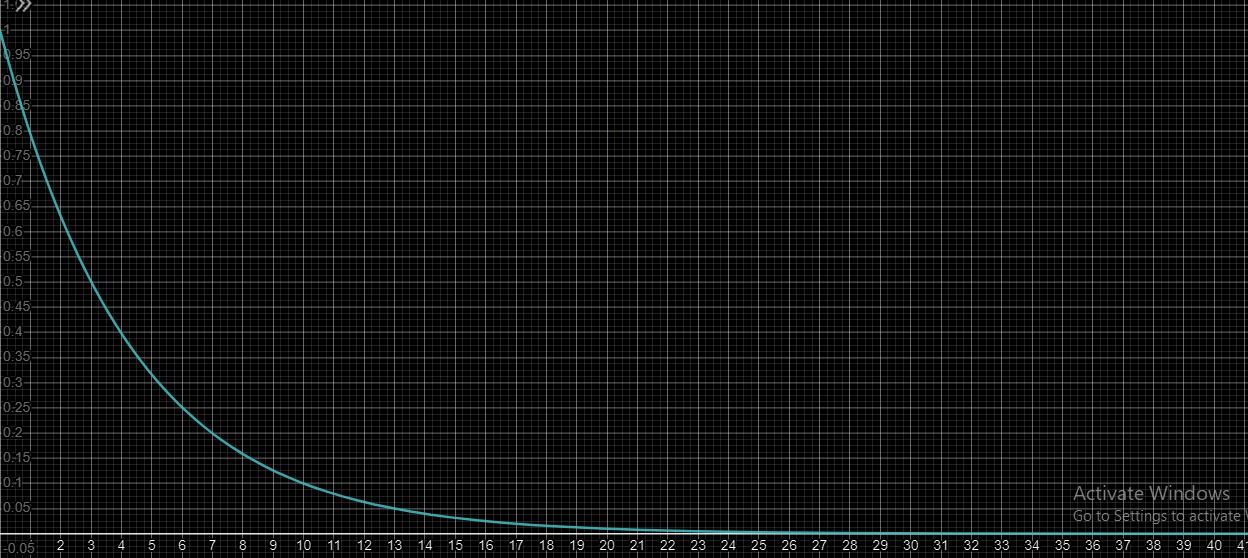
--Image drawn using desmos graphing calculator, Y-axis indicate probability of error, X-axis have phred score 


**c. Coverage**  
Coverage is number of reads that align to reference base. A 100x coverage means 100 reads get aligned to the reference bases.
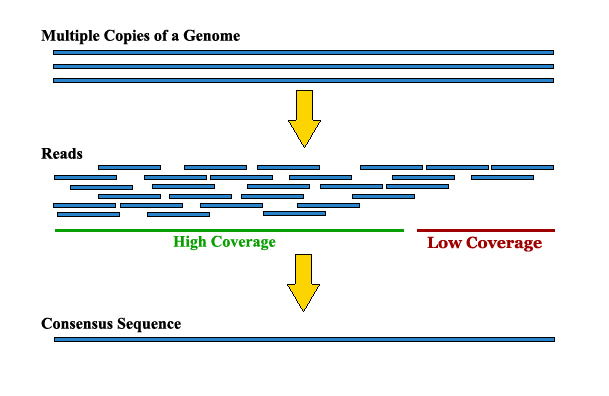
[Image Source](http://gcat.davidson.edu/phast/img/coverage.png)


**d. Reads**
For sequencing the DNA is fragmented in small parts, then those short fragments are sequenced.
Those small fragments that are getting sequenced are called read.  
Length of the reads depend on the sequencing platform, illumina platforms have shorter read length, While PacBio and Oxford Nanopore platforms have very high read leghts.

---
D. Explain the format of a fastq file. which is the most commonly used public database to download fastq files.

**Ans** Fastq files are plain text files that contains the read sequence information.  
Information for a single read is captured in 4 lines.

-

*Line 1* @SRR14001961.793115 793115 length=251  
*Line 2* CCACATCCCCGACCCGAACAAGGTCGACCAAAGCGCT  
*Line 3* +SRR14001961.793115 793115 length=251  
*Line 4* 1>1>>B11>AA1AAE0AE?ECFCFF0//EEH/0BA/B  

-

Line 1 and line 3 are the headers, Line 1 starts with '@' symbol and Line 3 starts with '+' symbol and all the other information they contain remains same.  
Line 2 contains the Sequence of the Read.  
Line 4 contains the phred score depicting quality of base call for the corresponding base in line 2 in ASCII code

NCBI SRA is the most commonly used public database for downloading fastq files.

#Q2
A. Does Mycobacterium tuberculosis h37rv have a reference sequence? If yes,

**Yes**

B. Give the accession ID of the reference sequence.

**NC_000962.3**

C. Download the fasta file of the reference sequence without using any gui.

In [ ]:
import requests
euti_url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=NC_000962.3&retmode=text&rettype=fasta"
seq = requests.get(euti_url).text
with open("M_tb_H37v.fasta","w") as f:
  f.write(seq)

#Q3
A. Download the fastq file for sample SRR14001961. List the commands needed to perform the following actions and the output for the same.

In [ ]:
!apt-get install sra-toolkit

In [ ]:
!fastq-dump --split-3 SRR14001961

Read 793115 spots for SRR14001961
Written 793115 spots for SRR14001961


B. Show what is your current working directory.

In [ ]:
!pwd

/content


C. View only the last read information from the fastq file.

In [ ]:
!tail -4 SRR14001961_1.fastq

@SRR14001961.793115 793115 length=251
CCACATCCCCGACCCGAACAAGGTCGACCAAAGCGCTGTCAGCCAGATGCAGCGGCACGATGCGGGCGCCCGGGCCGGCAGTCGACTCGGCCAACCGGCTGCCCAGTAAACGCACGTCGGTGAGCACCTCGCCACGGCGTGTCTGGCTGGCCAGCGCCGAAACCACCAATGCGTCCAGGGCAGCTTGGGACCCGTCGGGAAGCGTGGGGGCCGGACGTGTTTCCAGCCTGACATCACCGGGAGTCAATGCG
+SRR14001961.793115 793115 length=251
1>1>>B11>AA1AAE0AE?ECFCFF0//EEH/0BA/B//BFDG0AA01B1111>>/>>?/FAE??@/>//>EC?/B?BCC/FCA//CGF.><-.<<CCCGCEA.:G/0:C0E---A.9--9;AFB0.9F.CA-BB;=--9@A-/9//--9--:--9----999-;-9--///99--;//---99B//---;AA-A9-;-9----9:---;;=@--9-9-;-9B////--;9///99B;-9-9@B//9B9/-


D. Extract the information from the last two reads of the Fastq file inside a text file.

In [ ]:
!tail -8 SRR14001961_1.fastq > last_reads.txt

E. Find the total number of reads present in the fastq file

In [ ]:
!grep -o + SRR14001961_1.fastq |wc -l

793115


#Q4
A. Attached are two csv files. (df1.csv and df2.csv), using R/Python/Shell/Bash do the following tasks.



In [ ]:
import pandas as pd
df1 =  pd.read_csv("df1.csv", header=0)
df2 =  pd.read_csv("df2.csv", header=0)

B. Merge the two dataframes based on the common information.

In [ ]:
merged_df = pd.merge(df1, df2, how = "outer")
print(merged_df)

   IDs chromosome  position allle1 allele2    trait
0   a1          1   1000453      A       G  Trait A
1   b1         22   2945720      T       G  Trait B
2   c1          2      3400      C       G  Trait C
3   d2          X       105      G       T  Trait D
4  NaN          1    100442    NaN     NaN  Trait X
5  NaN          2       105    NaN     NaN  Trait Y
6  NaN          3      3400    NaN     NaN  Trait G
7  NaN          5     70034    NaN     NaN  Trait H


C. Extract the allele 1 and allele 2 information of the trait D.

In [ ]:
merged_df[merged_df["trait"]=="Trait D"][["allle1","allele2"]]

,allle1,allele2
3,G,T


D. Export the merged dataset into a csv file.

In [ ]:
merged_df.to_csv("merged_dataset.csv")